In [36]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

In [37]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#load data
path = "/content/drive/My Drive/Colab Notebooks/data/"
data_train = pd.read_csv(path+'data_train.csv',index_col=0)
data_test = pd.read_csv(path+'data_test.csv',index_col=0)

In [ ]:
data_train.info()

In [41]:
# specify the data type to reduce the memory
data_dtype = {
    'user_id': np.int32,
    'product_id': np.int32,
    'LO_dow':np.int8,
    'LO_hour_of_day':np.int8,
    'LO_days_since_prior_order':np.float16,
    'UxP_num_of_orders':np.int8,     
    'UxP_order_dow_mean':np.float16,
    'UxP_order_dow_std':np.float16,
    'UxP_order_hour_of_day_mean':np.float16,
    'UxP_order_hour_of_day_std':np.float16,
    'UxP_add_to_cart_order_mean':np.float16,
    'UxP_add_to_cart_order_std':np.float16,
    'UxP_last_order':np.int8, 
    'UxP_order_ratio':np.float16,
    'UxP_orders_since_last':np.int8,
    'UxP_last_order_ratio':np.float16,
    'UxP_reordered':np.int8,
    'u_num_of_orders':np.int8,  
    'u_num_of_products':np.int16, 
    'u_products_mean':np.float16,
    'u_products_std':np.float16, 
    'u_unique_products':np.int16,  
    'u_num_of_reordered_products':np.int16,
    'u_reordered_mean':np.float16,
    'u_reordered_std':np.float16,
    'u_order_dow_mean':np.float16,
    'u_order_dow_std':np.float16,
    'u_order_hour_of_day_mean':np.float16,
    'u_order_hour_of_day_std':np.float16,
    'u_days_between_orders_mean':np.float16,
    'u_days_between_orders_std':np.float16,
    'u_num_of_orders_containg_reorder':np.float16,
    'u_reordered_products_ratio':np.float16,
    'u_reordered_order_ratio':np.float16,
    'p_num_of_orders':np.int32, 
    'p_num_of_users':np.int16,
    'p_reorder_ratio':np.float16,
    'p_order_hour_of_day_mean':np.float16,
    'p_order_hour_of_day_std':np.float16,
    'p_order_dow_mean':np.float16,
    'p_order_dow_std':np.float16,
    'p_add_to_cart_order_mean':np.float16,
    'p_add_to_cart_order_std':np.float16,
    'p_days_between_orders_mean':np.float16,
    'p_days_between_orders_std':np.float16,
    'p_num_of_products_mean':np.float16,
    'p_num_of_products_std':np.float16,
    'reordered':np.int8
}

In [42]:
data_train = data_train.astype(data_dtype)

In [43]:
data_test = data_test.astype(data_dtype)

In [ ]:
data_train.info()

# Drop some features that are colinear with others

In [45]:
data_train.drop(columns = ['u_num_of_products','u_num_of_reordered_products','u_reordered_order_ratio','UxP_order_ratio','UxP_orders_since_last_ratio','UxP_last_order', 'UxP_last_order_ratio'],axis=1,inplace=True)

In [46]:
data_test.drop(columns = ['u_num_of_products','u_num_of_reordered_products','u_reordered_order_ratio','UxP_order_ratio','UxP_orders_since_last_ratio','UxP_last_order', 'UxP_last_order_ratio'],axis=1,inplace=True)

#Drop some less important features

In [47]:
data_train.drop(columns = ['p_order_hour_of_day_mean', 'p_order_hour_of_day_std', 'p_order_dow_mean', 'p_order_dow_std', 'p_add_to_cart_order_mean', 'p_add_to_cart_order_std', 'p_days_between_orders_mean','p_days_between_orders_std'],axis=1,inplace=True)
data_test.drop(columns = ['p_order_hour_of_day_mean', 'p_order_hour_of_day_std', 'p_order_dow_mean', 'p_order_dow_std', 'p_add_to_cart_order_mean', 'p_add_to_cart_order_std', 'p_days_between_orders_mean','p_days_between_orders_std'],axis=1,inplace=True)

In [ ]:
data_train.info()

In [49]:
X_train = data_train.iloc[:,2:33]
y_train = data_train['reordered']
X_test = data_test.iloc[:,2:33]
y_test = data_test['reordered']

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135070 entries, 0 to 1135069
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   UxP_num_of_orders                 1135070 non-null  int8   
 1   UxP_orders_since_last             1135070 non-null  int8   
 2   UxP_reordered                     1135070 non-null  int8   
 3   UxP_order_dow_mean                1135070 non-null  float16
 4   UxP_order_dow_std                 1135070 non-null  float16
 5   UxP_order_hour_of_day_mean        1135070 non-null  float16
 6   UxP_order_hour_of_day_std         1135070 non-null  float16
 7   UxP_add_to_cart_order_mean        1135070 non-null  float16
 8   UxP_add_to_cart_order_std         1135070 non-null  float16
 9   u_num_of_orders                   1135070 non-null  int8   
 10  u_products_mean                   1135070 non-null  float16
 11  u_products_std                    113

## helper function to print the scores for analyzing the model

In [24]:
def helper_train(model):
    
    pred = model.predict(X_train)
    tn, fp,fn, tp = confusion_matrix(y_train, pred).ravel()
    # Print the scores for the training data.
    print('accuracy_score=', accuracy_score(y_train,pred))
    print('recall_score=', recall_score(y_train,pred))
    print('f1_score', f1_score(y_train,pred))
    print('precision_score=', precision_score(y_train,pred))
    print(classification_report(y_train, pred))
    print('tn=',tn, ', fp=',fp, ', fn=',fn,', tp=',tp)
    print('roc_auc = ', metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

def helper_test(model):
    
    pred = model.predict(X_test)
    tn, fp,fn, tp = confusion_matrix(y_test, pred).ravel()
    # Print the scores for the testing data.
    print('accuracy_score=', accuracy_score(y_test,pred))
    print('recall_score=', recall_score(y_test,pred))
    print('f1_score', f1_score(y_test,pred))
    print('precision_score=', precision_score(y_test,pred))
    print(classification_report(y_test, pred))
    print('tn=',tn, ', fp=',fp, ', fn=',fn,', tp=',tp)
    print('roc_auc = ', metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# **Random** **Forest**

fit a random forest with default parameters to get a baseline idea of the performance

In [25]:
rfc_default = RandomForestClassifier(verbose=1, n_jobs=-1,oob_score=True,random_state=5)
rfc_default.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=5, verbose=1,
                       warm_start=False)

In [26]:
#scores for training set
helper_train(rfc_default)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   12.8s finished


accuracy_score= 0.9999612358709155
recall_score= 0.9996016693674691
f1_score 0.9998007950090094
precision_score= 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1024609
           1       1.00      1.00      1.00    110461

    accuracy                           1.00   1135070
   macro avg       1.00      1.00      1.00   1135070
weighted avg       1.00      1.00      1.00   1135070

tn= 1024609 , fp= 0 , fn= 44 , tp= 110417


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   13.2s finished


roc_auc =  1.0


In [27]:
#scores for testing set
helper_test(rfc_default)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.1s finished


accuracy_score= 0.906915405981933
recall_score= 0.1472725339382554
f1_score 0.23821126558692846
precision_score= 0.622751798561151
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    257280
           1       0.62      0.15      0.24     28213

    accuracy                           0.91    285493
   macro avg       0.77      0.57      0.59    285493
weighted avg       0.88      0.91      0.88    285493

tn= 254763 , fp= 2517 , fn= 24058 , tp= 4155


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s


roc_auc =  0.8133279643252871


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.0s finished


overfitting

n_estimator=  32


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   56.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    1.0s finished


train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1024609
           1       1.00      0.98      0.99    110461

    accuracy                           1.00   1135070
   macro avg       1.00      0.99      0.99   1135070
weighted avg       1.00      1.00      1.00   1135070

test
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    257280
           1       0.60      0.14      0.23     28213

    accuracy                           0.91    285493
   macro avg       0.76      0.57      0.59    285493
weighted avg       0.88      0.91      0.88    285493

n_estimator=  64


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:    7.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:    1.9s finished


train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1024609
           1       1.00      1.00      1.00    110461

    accuracy                           1.00   1135070
   macro avg       1.00      1.00      1.00   1135070
weighted avg       1.00      1.00      1.00   1135070

test
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    257280
           1       0.62      0.15      0.24     28213

    accuracy                           0.91    285493
   macro avg       0.77      0.57      0.59    285493
weighted avg       0.88      0.91      0.88    285493

n_estimator=  100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   12.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.9s finished


train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1024609
           1       1.00      1.00      1.00    110461

    accuracy                           1.00   1135070
   macro avg       1.00      1.00      1.00   1135070
weighted avg       1.00      1.00      1.00   1135070

test
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    257280
           1       0.62      0.15      0.24     28213

    accuracy                           0.91    285493
   macro avg       0.77      0.57      0.59    285493
weighted avg       0.88      0.91      0.88    285493

n_estimator=  200


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  6.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   23.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   24.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    5.8s finished


train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1024609
           1       1.00      1.00      1.00    110461

    accuracy                           1.00   1135070
   macro avg       1.00      1.00      1.00   1135070
weighted avg       1.00      1.00      1.00   1135070

test
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    257280
           1       0.63      0.15      0.24     28213

    accuracy                           0.91    285493
   macro avg       0.77      0.57      0.60    285493
weighted avg       0.89      0.91      0.88    285493



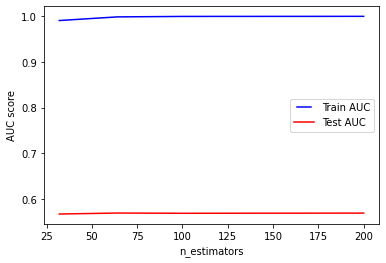

In [32]:
# tuning n_estimators 
n_estimators = [32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   print('n_estimator= ',estimator)
   rf = RandomForestClassifier(n_estimators=estimator,n_jobs=-1,oob_score=True,verbose=1,random_state=5)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   print('train')
   print(classification_report(y_train,train_pred))
   print('test')
   print(classification_report(y_test,y_pred))
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

The performance did not get much improvement when increasing n_estimators after >=64

In [29]:
# tuning max_depth and min_samples_split
param_test1 = {'max_depth':[8,16,32], 'min_samples_split':[50,100,200]}
gsearch1 =  GridSearchCV(estimator = RandomForestClassifier(n_estimators= 64,oob_score=True,n_jobs=-1,random_state=5),
  param_grid = param_test1, scoring='f1', cv=3,n_jobs=-1,verbose=2)
gsearch1.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 28.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=64, n_jobs=-1,
                                              oob_score=True, random_state=5,
                                       

In [30]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 32, 'min_samples_split': 50}, 0.22895757970818675)

In [31]:
#initialize a rfc using max_depth': 32, 'min_samples_split': 50
rf1 = RandomForestClassifier(n_estimators= 64,oob_score=True,max_depth=32,min_samples_split=50,n_jobs=-1,random_state=5)
rf1.fit(X_train,y_train)
rf1.oob_score_

0.9105112460024491

In [35]:
helper_train(rf1)

accuracy_score= 0.9244927625608993
recall_score= 0.25474149247245637
f1_score 0.3963686049132297
precision_score= 0.8926498112489294
              precision    recall  f1-score   support

           0       0.93      1.00      0.96   1024609
           1       0.89      0.25      0.40    110461

    accuracy                           0.92   1135070
   macro avg       0.91      0.63      0.68   1135070
weighted avg       0.92      0.92      0.90   1135070

tn= 1021225 , fp= 3384 , fn= 82322 , tp= 28139
roc_auc =  0.9594653458630571


In [37]:
helper_test(rf1)

accuracy_score= 0.9072761854055966
recall_score= 0.14993088292631057
f1_score 0.2421848162143593
precision_score= 0.6295579699360023
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    257280
           1       0.63      0.15      0.24     28213

    accuracy                           0.91    285493
   macro avg       0.77      0.57      0.60    285493
weighted avg       0.89      0.91      0.88    285493

tn= 254791 , fp= 2489 , fn= 23983 , tp= 4230
roc_auc =  0.820735841800814


The performance on test did not get much improvement, but it is not overfitting

In [30]:
#tuning 'min_samples_leaf' and 'min_samples_split'
param_test2 = {'min_samples_leaf':[12,24,48], 'min_samples_split':[50,100,200]}
gsearch2 =  GridSearchCV(estimator = RandomForestClassifier(n_estimators= 64,max_depth=32,oob_score=True,n_jobs=-1,random_state=5),
  param_grid = param_test2, scoring='f1', cv=3,verbose=2)
gsearch2.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] min_samples_leaf=12, min_samples_split=50 .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ min_samples_leaf=12, min_samples_split=50, total= 1.4min
[CV] min_samples_leaf=12, min_samples_split=50 .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] ........ min_samples_leaf=12, min_samples_split=50, total= 1.3min
[CV] min_samples_leaf=12, min_samples_split=50 .......................
[CV] ........ min_samples_leaf=12, min_samples_split=50, total= 1.3min
[CV] min_samples_leaf=12, min_samples_split=100 ......................
[CV] ....... min_samples_leaf=12, min_samples_split=100, total= 1.3min
[CV] min_samples_leaf=12, min_samples_split=100 ......................
[CV] ....... min_samples_leaf=12, min_samples_split=100, total= 1.3min
[CV] min_samples_leaf=12, min_samples_split=100 ......................
[CV] ....... min_samples_leaf=12, min_samples_split=100, total= 1.4min
[CV] min_samples_leaf=12, min_samples_split=200 ......................
[CV] ....... min_samples_leaf=12, min_samples_split=200, total= 1.3min
[CV] min_samples_leaf=12, min_samples_split=200 ......................
[CV] ....... min_samples_leaf=12, min_samples_split=200, total= 1.3min
[CV] min_samples_leaf=12, min_samples_split=200 ......................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 34.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=32,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=64, n_jobs=-1,
                                              oob_score=True, random_state=5,
                                         

In [31]:
gsearch2.best_params_, gsearch2.best_score_

({'min_samples_leaf': 12, 'min_samples_split': 50}, 0.22263043307053876)

In [38]:
#initializing a rfc using 'min_samples_leaf': 12, 'min_samples_split': 50
rf2 = RandomForestClassifier(n_estimators= 64,oob_score=True,max_depth=32,min_samples_split=50,min_samples_leaf=12,n_jobs=-1,random_state=5)
rf2.fit(X_train,y_train)
rf2.oob_score_

0.9101940849463028

In [39]:
helper_train(rf2)

accuracy_score= 0.9200172676575012
recall_score= 0.21588614986284752
f1_score 0.34441074523396875
precision_score= 0.8511010385809629
              precision    recall  f1-score   support

           0       0.92      1.00      0.96   1024609
           1       0.85      0.22      0.34    110461

    accuracy                           0.92   1135070
   macro avg       0.89      0.61      0.65   1135070
weighted avg       0.91      0.92      0.90   1135070

tn= 1020437 , fp= 4172 , fn= 86614 , tp= 23847
roc_auc =  0.9357401216297194


In [40]:
helper_test(rf2)

accuracy_score= 0.9074338074838962
recall_score= 0.14454329564385213
f1_score 0.23583841771968886
precision_score= 0.6401883830455259
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    257280
           1       0.64      0.14      0.24     28213

    accuracy                           0.91    285493
   macro avg       0.78      0.57      0.59    285493
weighted avg       0.89      0.91      0.88    285493

tn= 254988 , fp= 2292 , fn= 24135 , tp= 4078
roc_auc =  0.8255450586681751


The performance on test did not get much improvement

In [19]:
#tuning 'max_features'
param_test3 = {'max_features':[5,6,7,8]}
gsearch3 =  GridSearchCV(estimator = RandomForestClassifier(n_estimators= 64,max_depth=32,min_samples_split=50,min_samples_leaf=12,oob_score=True,n_jobs=-1,random_state=5),
  param_grid = param_test3, scoring='f1', cv=3,verbose=2,n_jobs=-1)
gsearch3.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 17.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 17.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=32,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=12,
                                              min_samples_split=50,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=64, n_jobs=-1,
                                              oob_score=True, random_state=5,
                                       

In [20]:
gsearch3.best_params_, gsearch3.best_score_

({'max_features': 8}, 0.24094624600733047)

In [50]:
#initializing a rfc using 'max_features': 8
rf3 = RandomForestClassifier(n_estimators= 64,oob_score=True,max_depth=32,min_samples_split=50,min_samples_leaf=12,max_features=8,n_jobs=-1,random_state=5)
rf3.fit(X_train,y_train)
rf3.oob_score_

0.9104627908410935

In [41]:
helper_train(rf3)

accuracy_score= 0.9213969182517378
recall_score= 0.23487927865943636
f1_score 0.36772730493940897
precision_score= 0.8465202779862312
              precision    recall  f1-score   support

           0       0.92      1.00      0.96   1024609
           1       0.85      0.23      0.37    110461

    accuracy                           0.92   1135070
   macro avg       0.88      0.62      0.66   1135070
weighted avg       0.92      0.92      0.90   1135070

tn= 1019905 , fp= 4704 , fn= 84516 , tp= 25945
roc_auc =  0.9390885887579321


In [42]:
helper_test(rf3)

accuracy_score= 0.907524878018025
recall_score= 0.15879204621982773
f1_score 0.25338649925058676
precision_score= 0.6267487409065473
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    257280
           1       0.63      0.16      0.25     28213

    accuracy                           0.91    285493
   macro avg       0.77      0.57      0.60    285493
weighted avg       0.89      0.91      0.88    285493

tn= 254612 , fp= 2668 , fn= 23733 , tp= 4480
roc_auc =  0.8253038903714072


recall and f1 increase a little

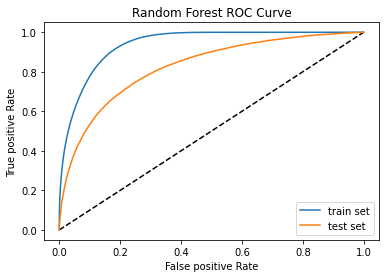

In [29]:
#plotting the ROC curve
y_pred_prob_train = rf3.predict_proba(X_train)[:,1]
y_pred_prob_test = rf3.predict_proba(X_test)[:,1]
fpr_train,tpr_train,thresholds_train = roc_curve(y_train,y_pred_prob_train)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_test)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_train,tpr_train,label='train set')
plt.plot(fpr,tpr,label='test set')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()
#thresholds

#looking for a better threshold

In [30]:
class CustomThreshold(BaseEstimator, ClassifierMixin):
    """ Custom threshold wrapper for binary classification"""
    def __init__(self, base, threshold=0.5):
        self.base = base
        self.threshold = threshold
    def fit(self, *args, **kwargs):
        self.base.fit(*args, **kwargs)
        return self
    def predict(self, X):
        return (self.base.predict_proba(X)[:, 1] > self.threshold).astype(int)

In [39]:
#try out some lower threshold for prediction
clf = [CustomThreshold(rf3, threshold) for threshold in [0.2,0.25,0.3,0.35,0.4,0.45,0.5]]

In [40]:
for model in clf:
    print(confusion_matrix(y_test, model.predict(X_test)))
    print(classification_report(y_test, model.predict(X_test)))

[[230045  27235]
 [ 12826  15387]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92    257280
           1       0.36      0.55      0.43     28213

    accuracy                           0.86    285493
   macro avg       0.65      0.72      0.68    285493
weighted avg       0.89      0.86      0.87    285493

[[238558  18722]
 [ 15154  13059]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93    257280
           1       0.41      0.46      0.44     28213

    accuracy                           0.88    285493
   macro avg       0.68      0.70      0.68    285493
weighted avg       0.89      0.88      0.88    285493

[[244319  12961]
 [ 17211  11002]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94    257280
           1       0.46      0.39      0.42     28213

    accuracy                           0.89    285493
   macro avg       0.70

0.25 seems to be a reasonable threshold for balancing the precision and recall

Text(0.5, 1.0, 'Random Forest Precision-Recall curve')

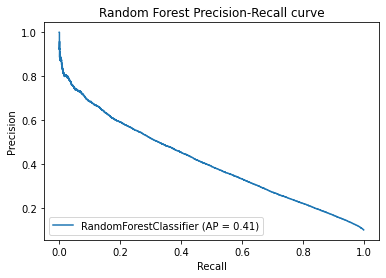

In [51]:
#precision recall curve

disp = plot_precision_recall_curve(rf3, X_test, y_test)
disp.ax_.set_title('Random Forest Precision-Recall curve')

# Feature importance

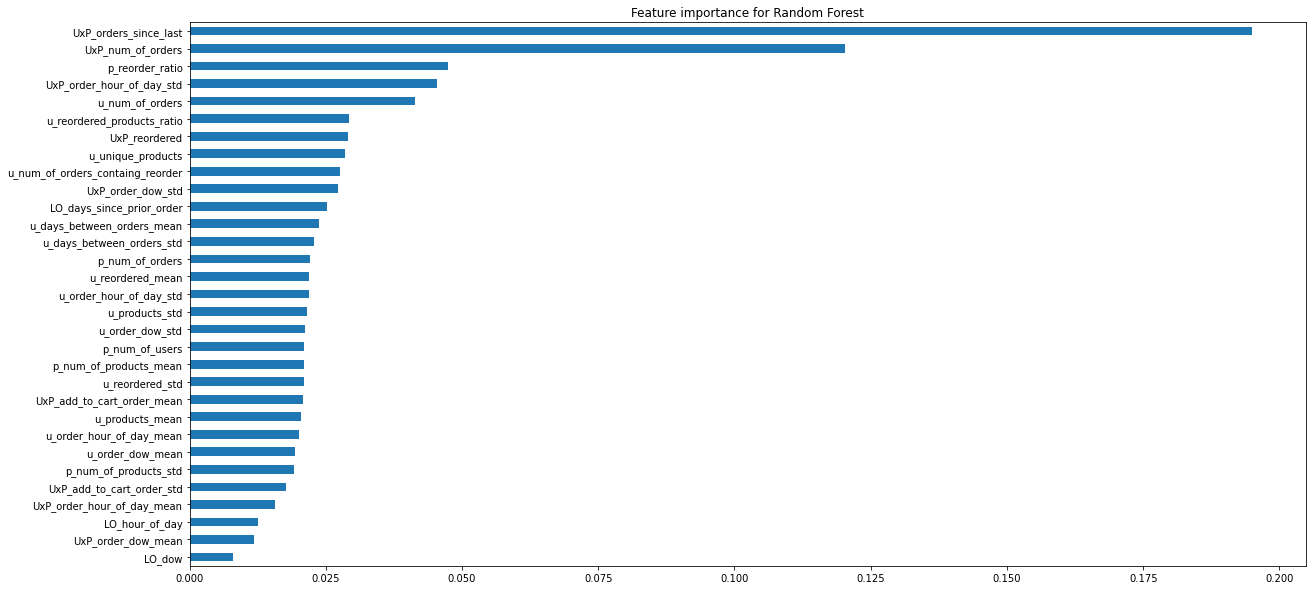

In [31]:
#plot graph of feature importances
plt.figure(figsize=(20,10))
feat_importances_rfc = pd.Series(rf3.feature_importances_, index=X_train.columns)
#feat_importances_rfc.nlargest(32).plot(kind='barh')
feat_importances_rfc.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature importance for Random Forest')
plt.show()